<a href="https://colab.research.google.com/github/Pierre-claver/Project/blob/master/Analyse_des_Performances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import os


In [23]:
file_path = "sample_data/nba_veteran_forwards.csv"
df = pd.read_csv(file_path)


In [24]:
print("Aperçu des données :")
print(df.head())
print("\nInformations générales :")
print(df.info())

Aperçu des données :
   PLAYER_ID         PLAYER_NAME NICKNAME     TEAM_ID TEAM_ABBREVIATION   AGE  \
0     203932        Aaron Gordon    Aaron  1610612743               DEN  28.0   
1    1630174       Aaron Nesmith    Aaron  1610612754               IND  24.0   
2    1629678   Admiral Schofield  Admiral  1610612753               ORL  27.0   
3     201143          Al Horford       Al  1610612738               BOS  38.0   
4    1630197  Aleksej Pokusevski  Aleksej  1610612766               CHA  22.0   

   GP   W   L  W_PCT  ...  BLK_RANK  BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  \
0  73  49  24  0.671  ...        62         31       72        31        46   
1  72  41  31  0.569  ...        45         38        2        52        59   
2  23  15   8  0.652  ...       205        177      201       198       201   
3  65  51  14  0.785  ...        21        164      125       173        88   
4  28  14  14  0.500  ...        91        172      182       125       139   

   PLUS_MINUS_RAN

In [27]:
print("\nStatistiques descriptives :")
print(df.describe())


Statistiques descriptives :
          PLAYER_ID       TEAM_ID         AGE          GP           W  \
count  2.080000e+02  2.080000e+02  208.000000  208.000000  208.000000   
mean   1.257956e+06  1.610613e+09   27.855769   52.985577   27.442308   
std    6.286157e+05  8.632564e+00    4.069251   21.314865   14.608797   
min    2.544000e+03  1.610613e+09   21.000000    2.000000    1.000000   
25%    2.039925e+05  1.610613e+09   25.000000   42.500000   15.750000   
50%    1.628985e+06  1.610613e+09   27.000000   57.500000   28.000000   
75%    1.629681e+06  1.610613e+09   31.000000   70.000000   40.000000   
max    1.630688e+06  1.610613e+09   39.000000   82.000000   62.000000   

                L       W_PCT         MIN         FGM         FGA  ...  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  ...   
mean    25.543269    0.508918   20.379327    3.495192    7.186058  ...   
std     12.432545    0.164586    9.424893    2.550737    5.044244  ...   
min      0.000000

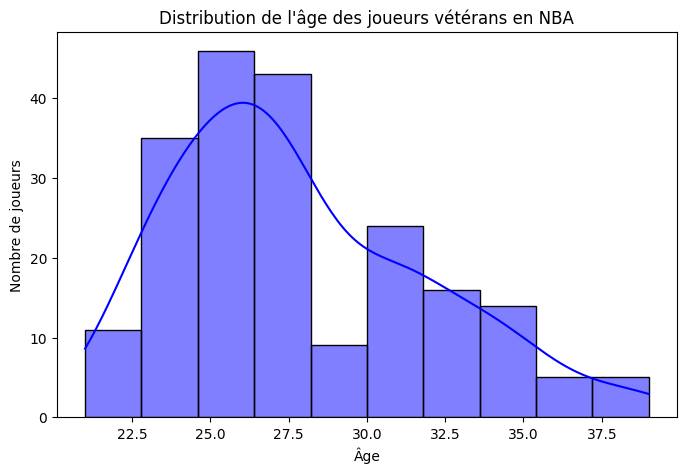

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df['AGE'], bins=10, kde=True, color='blue')
plt.title("Distribution de l'âge des joueurs vétérans en NBA")
plt.xlabel("Âge")
plt.ylabel("Nombre de joueurs")
plt.show()

In [31]:
top_scorers = df[['PLAYER_NAME', 'PTS']].sort_values(by='PTS', ascending=False).head(10)
print("\nTop 10 des meilleurs marqueurs :")
print(top_scorers)


Top 10 des meilleurs marqueurs :
               PLAYER_NAME   PTS
97             Joel Embiid  34.7
131            Luka Dončić  33.9
62   Giannis Antetokounmpo  30.4
116           Kevin Durant  27.1
90            Jayson Tatum  26.9
128           LeBron James  25.7
7            Anthony Davis  24.7
41           DeMar DeRozan  24.0
103          Julius Randle  24.0
109          Kawhi Leonard  23.7


<ipython-input-32-ebe6d2f703c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PTS', y='PLAYER_NAME', data=top_scorers, palette='coolwarm')


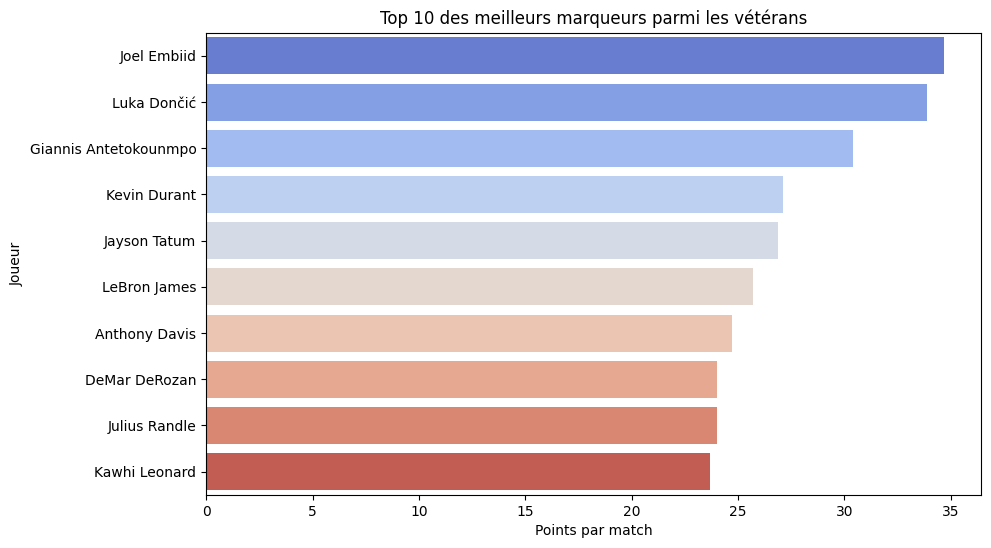

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='PTS', y='PLAYER_NAME', data=top_scorers, palette='coolwarm')
plt.xlabel("Points par match")
plt.ylabel("Joueur")
plt.title("Top 10 des meilleurs marqueurs parmi les vétérans")
plt.show()

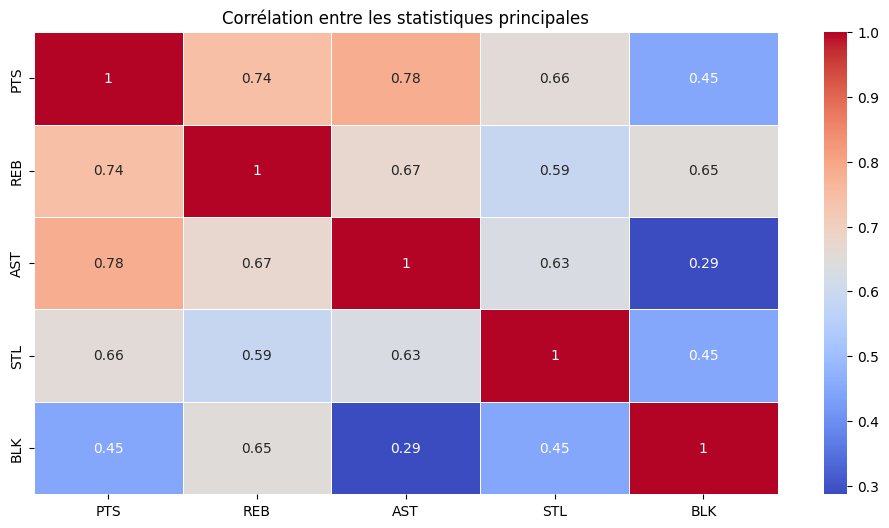

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['PTS', 'REB', 'AST', 'STL', 'BLK']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Corrélation entre les statistiques principales")
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
features = ['PTS', 'REB', 'AST', 'STL', 'BLK']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

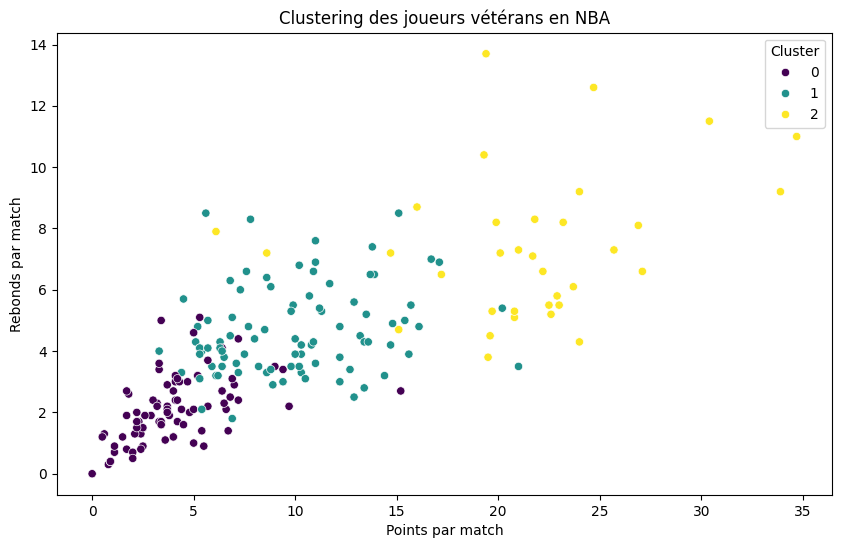

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['PTS'], y=df['REB'], hue=df['Cluster'], palette='viridis')
plt.xlabel("Points par match")
plt.ylabel("Rebonds par match")
plt.title("Clustering des joueurs vétérans en NBA")
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, df['PTS'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nÉvaluation du modèle : MAE = {mae:.2f}, R² = {r2:.2f}")


Évaluation du modèle : MAE = 0.00, R² = 1.00


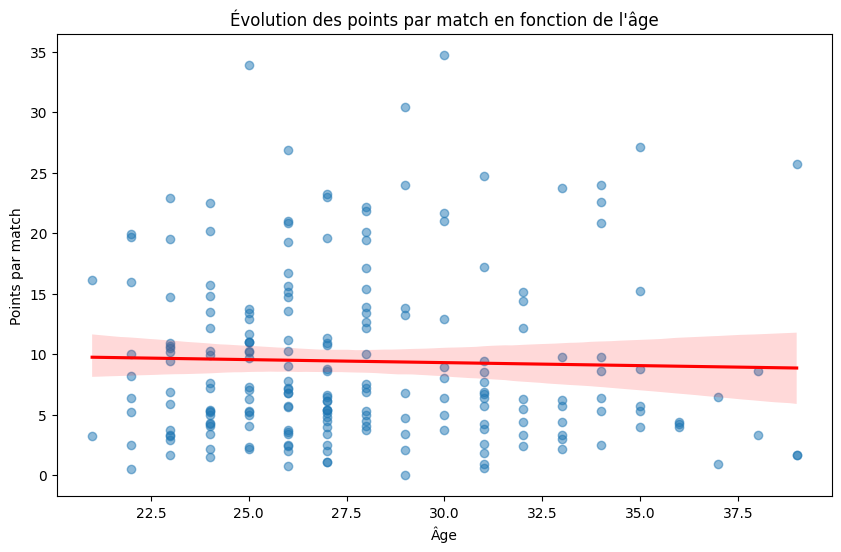

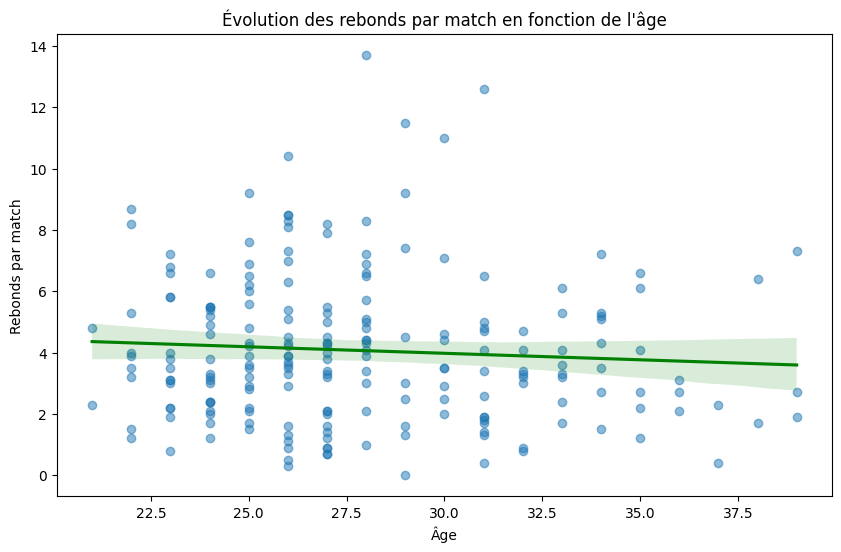

In [44]:
plt.figure(figsize=(10,6))
sns.regplot(x='AGE', y='PTS', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Évolution des points par match en fonction de l'âge")
plt.xlabel("Âge")
plt.ylabel("Points par match")
plt.show()

plt.figure(figsize=(10,6))
sns.regplot(x='AGE', y='REB', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
plt.title("Évolution des rebonds par match en fonction de l'âge")
plt.xlabel("Âge")
plt.ylabel("Rebonds par match")
plt.show()

In [45]:
df['Performance_Index'] = (df['PTS'] + df['REB'] + df['AST'] + df['STL'] + df['BLK'])

In [46]:
top_performers = df[['PLAYER_NAME', 'Performance_Index']].sort_values(by='Performance_Index', ascending=False).head(10)
print("\nTop 10 des joueurs les plus impactants :")
print(top_performers)


Top 10 des joueurs les plus impactants :
               PLAYER_NAME  Performance_Index
131            Luka Dončić               54.8
97             Joel Embiid               54.2
62   Giannis Antetokounmpo               50.7
7            Anthony Davis               44.3
128           LeBron James               43.1
47        Domantas Sabonis               42.8
90            Jayson Tatum               41.5
116           Kevin Durant               40.8
103          Julius Randle               39.0
178         Scottie Barnes               37.0


<ipython-input-47-36666b0460fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Performance_Index', y='PLAYER_NAME', data=top_performers, palette='magma')


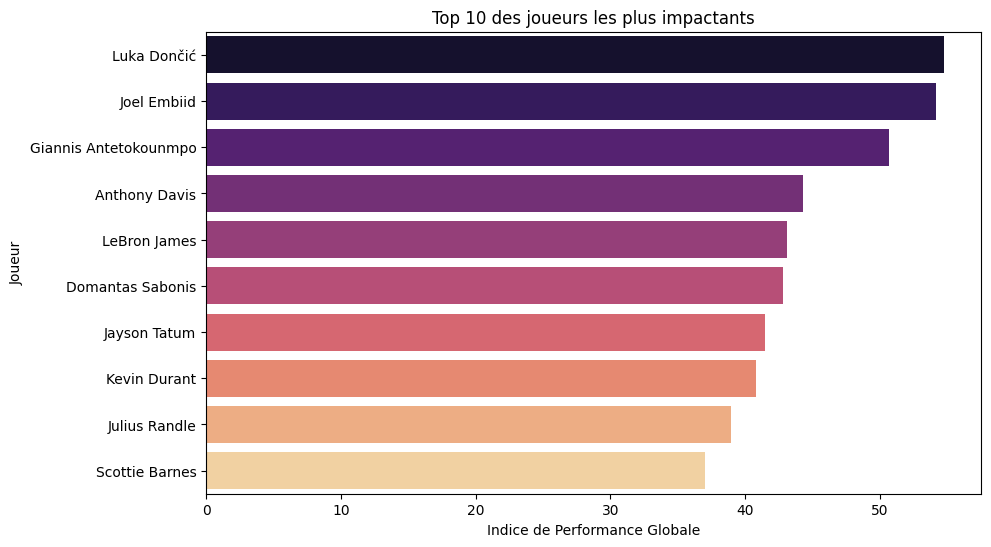

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x='Performance_Index', y='PLAYER_NAME', data=top_performers, palette='magma')
plt.xlabel("Indice de Performance Globale")
plt.ylabel("Joueur")
plt.title("Top 10 des joueurs les plus impactants")
plt.show()